# Technical Data Challenge
****

Dataset description: https://archive.ics.uci.edu/ml/datasets/automobile

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://cdn.pixabay.com/photo/2016/03/31/15/11/automobile-1293066_1280.png", width = 500)

# Tasks: 

### 1. List as many use cases for the dataset as possible.

Before going in more depth about the possible use cases, one must first understand what sort of data he has to deal with. So the steps I would take before assessing the possible use cases are:
    1. Reading the data
    2. Finding any abnormalities with the dataset (missing data, shape of the data, etc.)
    3. Asses how to tackle the abnormalities
    4. Define possible use casses

In [18]:
import pandas as pd
import numpy as np

### plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns 
import pylab as pl

%matplotlib inline

#### Reading Data
****

In [3]:
automobile = pd.read_csv("Auto1-DS-TestData.csv")
### making it easier to use throughtout the code
new_column_names = [item.replace('-','_') for item in automobile.columns.tolist()]
automobile.columns = new_column_names

automobile.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
automobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized_losses    205 non-null object
make                 205 non-null object
fuel_type            205 non-null object
aspiration           205 non-null object
num_of_doors         205 non-null object
body_style           205 non-null object
drive_wheels         205 non-null object
engine_location      205 non-null object
wheel_base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb_weight          205 non-null int64
engine_type          205 non-null object
num_of_cylinders     205 non-null object
engine_size          205 non-null int64
fuel_system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression_ratio    205 non-null float64
horsepower           205 non-nul

**First notes:**

* It's already obvious from the first rows of the dataset that there is some missing data.
* We have a few columns which are inferred directly as int and float, some which are categorical, and some which could be floats (such as normalized_losses) but aren't due to missing data represented as strings ("?")

#### Data Dictionary (from the abstract): 


Attribute: Attribute Range

* **symboling**: -3, -2, -1, 0, 1, 2, 3. (measure to determine insurance risk)
* **normalized-losses**: continuous from 65 to 256.
* make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo

* fuel-type: diesel, gas.

* aspiration: std, turbo.
* num-of-doors: four, two.
* body-style: hardtop, wagon, sedan, hatchback, convertible.
* drive-wheels: 4wd, fwd, rwd.
* engine-location: front, rear.
* wheel-base: continuous from 86.6 120.9.
* length: continuous from 141.1 to 208.1.
* width: continuous from 60.3 to 72.3.
* height: continuous from 47.8 to 59.8.
* curb-weight: continuous from 1488 to 4066.
* engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
* num-of-cylinders: eight, five, four, six, three, twelve, two.
* engine-size: continuous from 61 to 326.
* fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
* bore: continuous from 2.54 to 3.94.
* stroke: continuous from 2.07 to 4.17.
* compression-ratio: continuous from 7 to 23.
* horsepower: continuous from 48 to 288.
* peak-rpm: continuous from 4150 to 6600.
* city-mpg: continuous from 13 to 49.
* highway-mpg: continuous from 16 to 54.

* **price**: continuous from 5118 to 45400.

**Clean up for readability**

In [5]:
automobile.replace("?", np.nan,inplace=True)

missing_values = automobile.isnull().sum().reset_index()
missing_values[missing_values[0] > 0].rename(columns = {'index':'Column Names',
                                                       0:'# Missing Values'})

,Column Names,# Missing Values
1,normalized_losses,41
5,num_of_doors,2
18,bore,4
19,stroke,4
21,horsepower,2
22,peak_rpm,2
25,price,4


* From the data dictionary, most of the columns we have can be used as features for a model, but 3 columns in particular can be used for the explained variable or target, while at the same time used as explanatory variables. These columns are: `price`, `symboling` and `normalized_losses`
* As there are 41 missing values (1/5 of the rows) for `normalized_losses`, but seem to be dependent on the `symboling` variable (from the description), it might be worth running a regression model to replace missing values there with a correct assumption. 

#### Assessing possible use casses:
* random forrest regressor model to predict the value of the normalised losses for missing values - this can be used further in other models to prevent situations where we don't have this value, and get more accurate results
* run a linear regression to predict prices of a car given it's characteristics (as discussed during the interview, this is one important task that is currently done manually)
* use a classification model to predict the insurance risk (symboling) of a car given the input characteristics 
* predicting CO2 emissions (but would need further research and to further look for extra data - maybe we already can request more data from costumers) - initial research: https://www.jstor.org/stable/2109927?seq=1#page_scan_tab_contents

### 2. Pick one of the use cases you listed in question 1 and describe how building a statistical model based on the dataset could best be used to improve the company's business.

At a first view, the linear regression for predicting price is the most valuable one for the business. One quick internet research (https://www.quora.com/What-are-common-problems-car-dealerships-face-other-than-selling-cars) shows that the immediate concerns to be tackled in this industry are:
* Inventory - getting the right one 
* Financing the purchase of the vehicle for retail sale
* Obtaining financing for the consumer when the vehicle is ultimately retailed.
* Legal issues that can arise

All of the above represent costs which a simple linear regression can speed up the decission process: asses quickly if the car is too damaged or too old to be purchased and put the effort into it. The business can then asses if the car might still be valuable in different ways (use parts of the car for it's parts, decide if this is a market that they would even want to enter, etc.)

Before finally deciding on it, we need to understand the data better. 


**Replacing missing values with the Average**

* whie we did mention earlier that it would be great to run a model for getting the correct values for missing values, in practice, we don't always have time to do the absolute correct thing. We'll replace missing values with the average of the column for simplicity.

In [6]:
from sklearn.preprocessing import Imputer

imp = Imputer(missing_values='NaN', strategy='mean')
df = automobile.copy()
df[['bore','stroke','horsepower','peak_rpm','price']] = imp.fit_transform(df[['bore','stroke','horsepower','peak_rpm','price']])

### fair assumption that most cars usually have 4 doors
df['num_of_doors'] = df['num_of_doors'].fillna('four')
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


* Assuming that the normalized_losses column is normally distributed, we'll replace the missing values using a random different normal distribution, by using the similar shape which the column has right now.

In [7]:
mean_normalized_losses = df[df.normalized_losses.notnull()].normalized_losses.astype(float).mean()
std_normalized_losses = df[df.normalized_losses.notnull()].normalized_losses.astype(float).std()

values = np.random.normal(loc=mean_normalized_losses, scale=std_normalized_losses, size=1000)
replacing_values = [int(value) for value in np.random.choice(values, size= df[df.normalized_losses.isnull()].shape[0])]

df.loc[(df.normalized_losses.isnull()), 'normalized_losses'] = replacing_values
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,118,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,104,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,104,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


**Encoding categorical data**



In [8]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
for i in ['make','fuel_type','aspiration', 'num_of_doors','body_style','drive_wheels','engine_location','engine_type','num_of_cylinders','fuel_system']:
    df[i] = labelencoder.fit_transform(df[i])
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,118,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,104,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,104,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


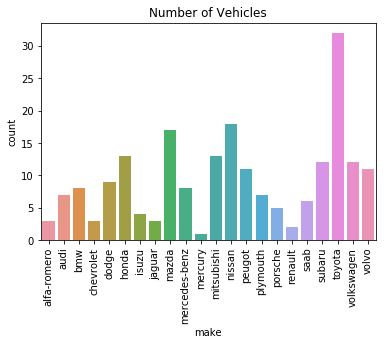

In [9]:
sns.countplot(x='make', data=automobile)
plt.xticks(rotation='vertical')
plt.title("Number of Vehicles");

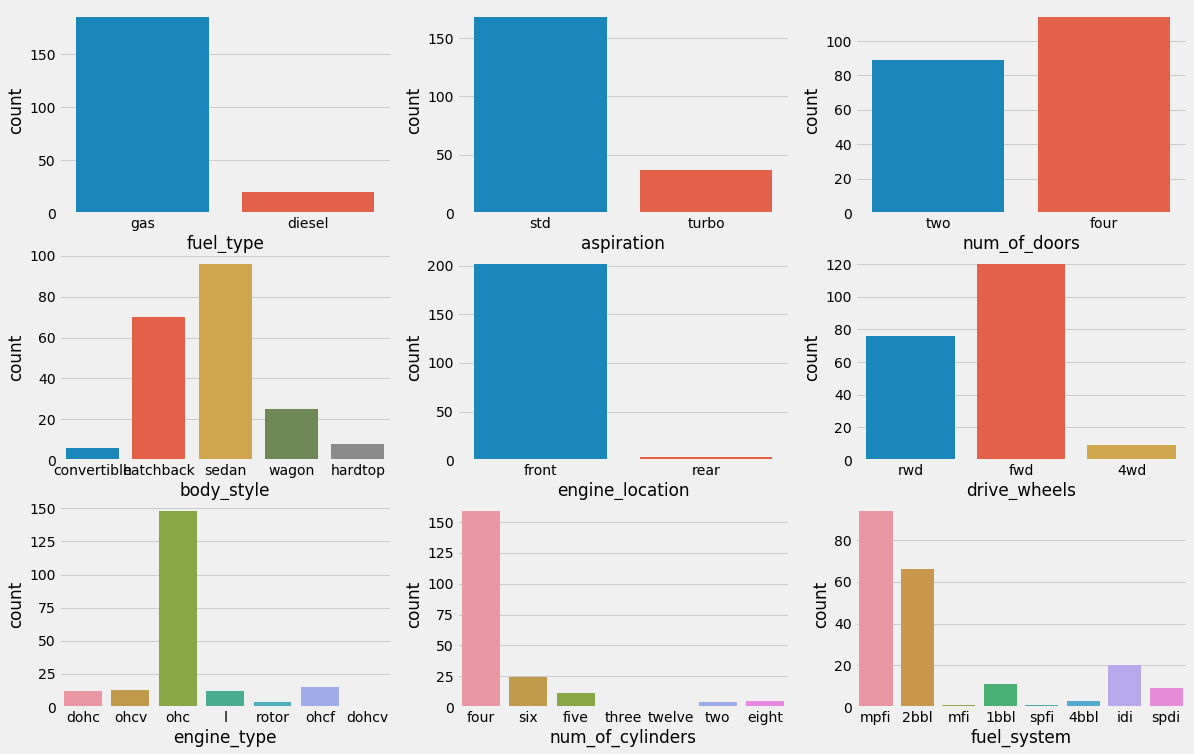

In [10]:
### Categorical features distribution

plt.style.use('fivethirtyeight')


categorical = ['make', 
               'fuel_type',
               'aspiration',
               'num_of_doors',
               'body_style',
               'engine_location',
               'drive_wheels',
               'engine_type',
               'num_of_cylinders',
               'fuel_system']

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
for col, ax in zip(categorical[1:], axs.ravel()):
    sns.countplot(x=col, data=automobile, ax=ax)

**Findings: **
    * Toyota is the most popular car in the set
    * most cars run on gas
    * most cars have four doors
    * most cars are of sedan body style
    * most cars have the engine in the front
    * most cars have a mpfi fuel system
    * most cars run on four cylinders
    * most cars have ohc engine type

**Correlation Analysis**

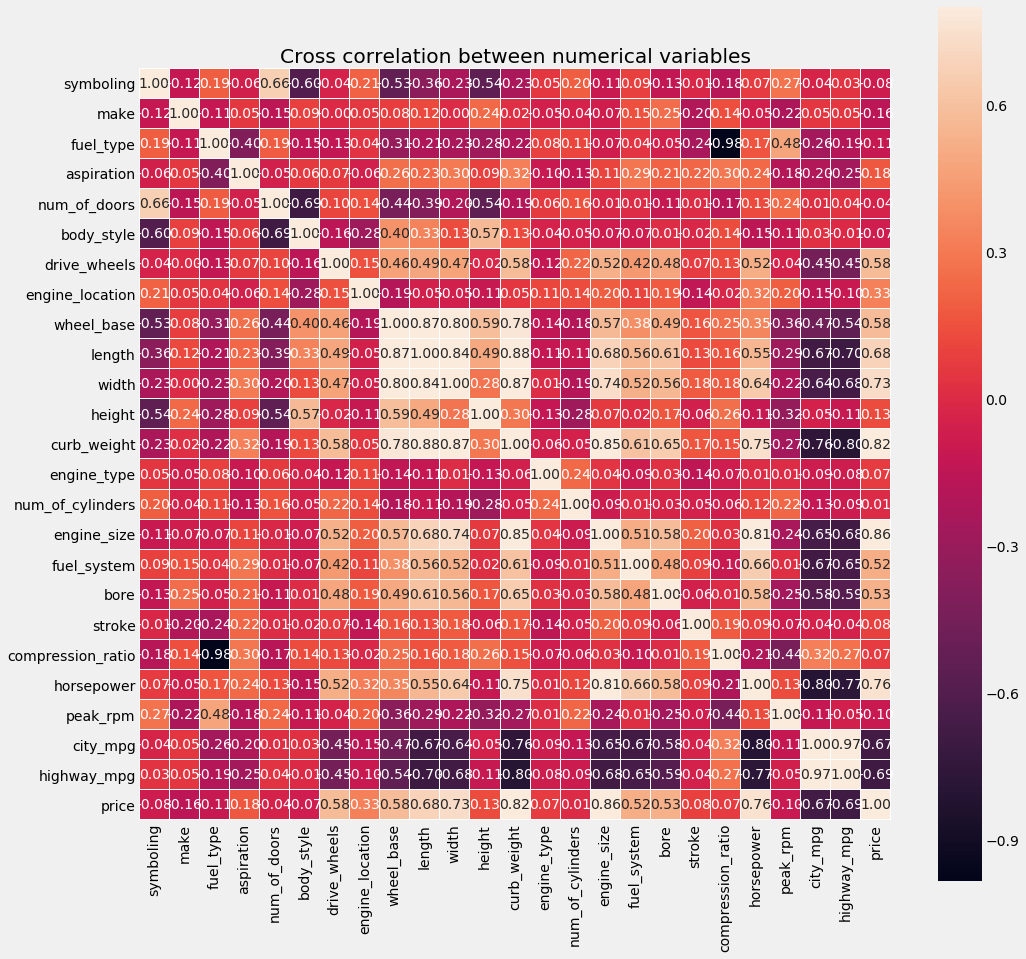

In [11]:
plt.figure(figsize=(15, 15))
ax = sns.heatmap(df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Cross correlation between numerical variables')
plt.show()

* wheel base, length, width are highly and positively correlated.
* highway mpg and city_mpg are highly and positively correlated
* compression ratio and fuel type are highly and negatively correlated
* engine size and horsepower are highly and positively correlated.

This is useful for us to take out unnecessary redundant features.

Attributes which have a high correlation with the selected target (price): curb_weight, engine_size, horsepower, mpg, length/widght

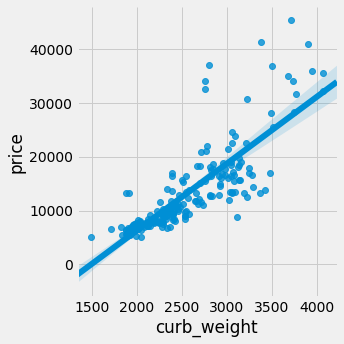

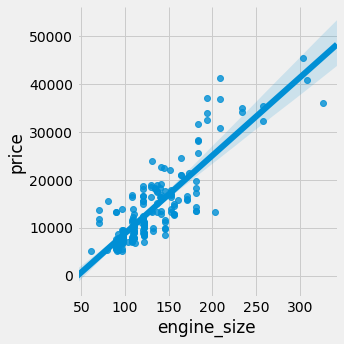

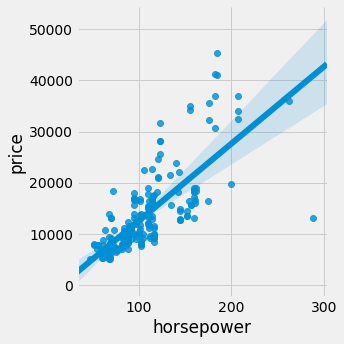

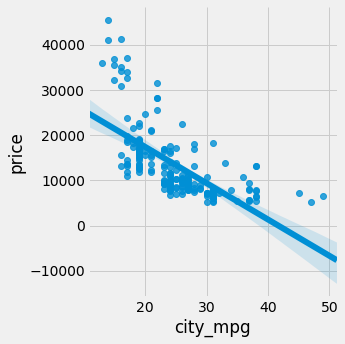

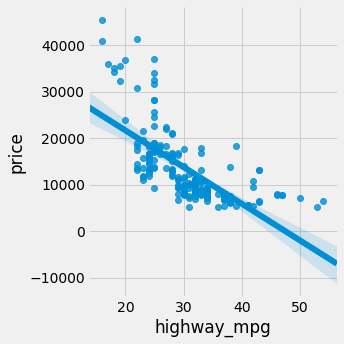

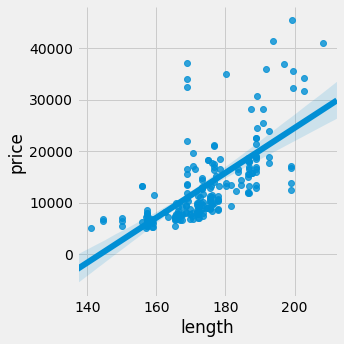

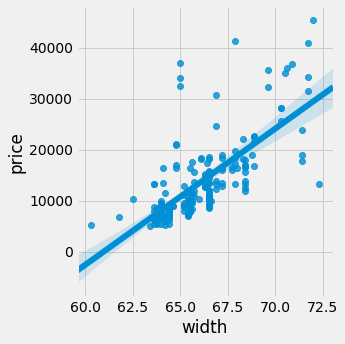

In [12]:
high_corr = ['curb_weight','engine_size','horsepower', 'city_mpg','highway_mpg','length','width']

for col in high_corr:
    sns.lmplot(x= col, y='price', data=df)


If the features which have a strong correlation with the `price` column have a linear representation, the best solution to predict price in this case wold be a **linear regression**. 

In [13]:
df_reduced = df.drop(['length','width','city_mpg','fuel_type','horsepower'],axis=1)
df_reduced.head()

,symboling,normalized_losses,make,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,height,...,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,peak_rpm,highway_mpg,price
0,3,118,0,0,1,0,2,0,88.6,48.8,...,0,2,130,5,3.47,2.68,9.0,5000.0,27,13495.0
1,3,104,0,0,1,0,2,0,88.6,48.8,...,0,2,130,5,3.47,2.68,9.0,5000.0,27,16500.0
2,1,104,0,0,1,2,2,0,94.5,52.4,...,5,3,152,5,2.68,3.47,9.0,5000.0,26,16500.0
3,2,164,1,0,0,3,1,0,99.8,54.3,...,3,2,109,5,3.19,3.40,10.0,5500.0,30,13950.0
4,2,164,1,0,0,3,0,0,99.4,54.3,...,3,1,136,5,3.19,3.40,8.0,5500.0,22,17450.0


### 3. Implement the model you described in question 2 in R or Python. The code has to retrieve the data, train and test a statistical model, and report relevant performance criteria. 



**Normalising data before training the model**:

In [14]:
from sklearn.preprocessing import Normalizer
# Normalizing Data
norm = Normalizer()
columns = df_reduced.columns
df_normalised = pd.DataFrame(norm.fit_transform(df_reduced), columns = columns)

df_normalised.head()

,symboling,normalized_losses,make,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,height,...,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,peak_rpm,highway_mpg,price
0,0.000205,0.008073,0.000000,0.0,0.000068,0.000000,0.000137,0.0,0.006062,0.003339,...,0.000000,0.000137,0.008894,0.000342,0.000237,0.000183,0.000616,0.342073,0.001847,0.923256
1,0.000172,0.005967,0.000000,0.0,0.000057,0.000000,0.000115,0.0,0.005083,0.002800,...,0.000000,0.000115,0.007459,0.000287,0.000199,0.000154,0.000516,0.286873,0.001549,0.946681
2,0.000057,0.005952,0.000000,0.0,0.000057,0.000114,0.000114,0.0,0.005409,0.002999,...,0.000286,0.000172,0.008700,0.000286,0.000153,0.000199,0.000515,0.286175,0.001488,0.944376
3,0.000132,0.010805,0.000066,0.0,0.000000,0.000198,0.000066,0.0,0.006575,0.003578,...,0.000198,0.000132,0.007182,0.000329,0.000210,0.000224,0.000659,0.362370,0.001977,0.919103
4,0.000108,0.008858,0.000054,0.0,0.000000,0.000162,0.000000,0.0,0.005369,0.002933,...,0.000162,0.000054,0.007346,0.000270,0.000172,0.000184,0.000432,0.297065,0.001188,0.942505


**Splitting data into training and test data**

In [15]:
from sklearn.model_selection import train_test_split
Y = df_normalised['price']
X = df_normalised.drop('price',axis =1)

### splitting the data in a 70-30 split
x_train, x_test, y_train,  y_test = train_test_split(X, Y,train_size=0.7, test_size=0.3,
                                                                             random_state=0)

**Training the model**

In [16]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
lm_1 = regressor.fit(x_train, y_train)

In [17]:
print "R^2 for training set: {0}".format(lm_1.score(x_train,y_train))
print "R^2 for test set: {0}".format(lm_1.score(x_test,y_test))

R^2 for training set: 0.980636523373
R^2 for test set: 0.960677970223


### 4. A. Explain each and every of your design choices (e.g., preprocessing, model selection, hyper parameters, evaluation criteria). Compare and contrast your choices with alternative methodologies. 

Point 1 explains why the data needed preprocessing. 

Point 2 covers the explanation of how I reached the conclusion that a linear regression makes more sense for the problem. Using a different regressor such as Random Forests or SVMs could also work, as they work well for non-linearly sepparable datasets well, but as it is not the case here, and saving computational resources is always an advantage, the business problem could be solved quicker this way.

R^2 is the measure value that reflects how well the model fits the observations. A value of 1 would be a 100% correctness. In practice, we wouldn't want such value since it could mean that we're overfitting the model and will likely misrepresent new data. A value of 0.96 for the test data shows that this is a good model choice. 

### 4. B. Describe how you would improve the model in Question 3 if you had more time.


* Since this is a simple model, I didn't consider it necessary, but normally I would split the dataset in 3: training, validation and test, and use the validation set to fine-tune the hyper parameters. 
* If I had more time, I would gather more data on milage of the car, possible dents and damages, past accidents if there are any.
* I would talk with stakeholders about what sort of other problems they have and see if the model can help in other parts of the business as well.
* I would evaluate if with the new gathered data, the strength of the correlations stay the same and if a linear regression still makes sense. In practice, most of the times the data will not be linearly separable and not this small either. 
* If the number of features would increase drastically, I'd consider other models for reducing dimensionality.

